In [ ]:
import requests
import json
import webbrowser

#Consumer_key is distinct for my pocketapp
redirect_uri = 'https://getpocket.com/my-list/search?query=e'
consumer_key = '96966-b4be73510099983d61b4e3b4'

with open('api_params.json','r') as api_params:
    params = json.load(api_params)

print(params["consumer_key"])

In [ ]:
#Get the AccessToken
access_params = {
    "consumer_key":
    params["consumer_key"],
    "redirect_uri":
    redirect_uri
}

consumer_key = params["consumer_key"]
response = requests.post('https://getpocket.com/v3/oauth/request',
                         params=access_params)
print(response.status_code)

response.content

In [6]:
request_token = response.content
request_token = str(request_token)
_, request_token = request_token.split('=')
request_token = request_token[0:-1]

In [ ]:
code = request_token
request_token

In [8]:
#log in with your Account to the App
webbrowser.open_new_tab('https://getpocket.com/auth/authorize?request_token='+ 
                        params["request_token"] + 
                        '&redirect_uri=' +                        
                        params["redirect_uri"]
                       )

True

In [ ]:
#Authorization Request
autho_params = {
    "consumer_key":
    params["consumer_key"],
    "code": 
    params["request_token"]
    }

response = requests.post('https://getpocket.com/v3/oauth/authorize', params = autho_params)
print(response.status_code)

response.content


In [2]:
#get all unread articles from pocket
import requests
data = {
    "consumer_key": params["consumer_key"],
    "access_token": params["access_token"],
    #"count": "10",
    "state": "unread",
    "detailType": "complete"
}

API_ENDPOINT = "https://getpocket.com/v3/get"

# sending post request and saving response as response object
r = requests.post(url=API_ENDPOINT, data=data)
r.status_code

200

In [ ]:
r.json()

In [4]:
#read Article Reading Times and Count Words
articles_dict = r.json()
articles = articles_dict['list']

words_to_read = 0
total_reading_time = 0
for article_number in articles:
    
    words_to_read = words_to_read + int(articles[article_number]['word_count'])
    try:
        total_reading_time = total_reading_time + int(articles[article_number]['time_to_read'])
        #print(articles[article_number]['time_to_read'])
    except:
        total_reading_time = total_reading_time + int(int(articles[article_number]['word_count'])/200)
        #print(articles[article_number]['word_count'])
        
print(f"Es gibt {len(articles)} Artikel, die du noch lesen solltest")        
print(f"Deine Pocketliste hat {words_to_read} ungelesene Wörter für dich")
print(f"Es gibt noch {total_reading_time} Minuten Lesezeit für dich")


Es gibt 368 Artikel, die du noch lesen solltest
Deine Pocketliste hat 513567 ungelesene Wörter für dich
Es gibt noch 2396 Minuten Lesezeit für dich


In [5]:
from datetime import timedelta
str(timedelta(minutes=total_reading_time))[:-3]

'1 day, 15:56'

In [6]:
len(articles)

368

In [9]:
#get all unread articles from pocket
import requests


data = {
    "consumer_key": params["consumer_key"],
    "access_token": params["access_token"],
    #"count": "10",
    "state": "archive",
    "detailType": "simple"
}

API_ENDPOINT = "https://getpocket.com/v3/get"

# sending post request and saving response as response object
r = requests.post(url=API_ENDPOINT, data=data)
r.status_code

200

In [ ]:
r.json()

In [16]:
from datetime import datetime, timedelta, timezone

#put timezone in now()
unix_ts = datetime.now(timezone(timedelta(hours=2))).timestamp()
dt = (datetime.fromtimestamp(unix_ts) - timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
print(dt)

2021-05-23 21:43:44


In [14]:
from datetime import datetime
datetime.now().timestamp()

1621806042.751099

In [12]:
import pandas as pd

df = pd.DataFrame(columns = ['article_number','number_of_words','timestamp','time_to_read'])

articles_dict = r.json()
articles = articles_dict['list']

words_to_read = 0
time_read = 0
for i, article_number in enumerate(articles):
    words_to_read = int(articles[article_number]['word_count'])
    time_read = int(articles[article_number]['time_read'])
    
    try:
        time_to_read = int(articles[article_number]['time_to_read'])
    except:
        time_to_read = round(words_to_read/200)
    df.loc[i] = [article_number,words_to_read,time_read,time_to_read]
    

In [103]:
#generate datetime out of unixtimestamp and split it in Date and Time of the Day (d_time)

df['time'] = pd.to_datetime(df['timestamp'], unit='s')

time_and_date = df['time'].apply(lambda x: str(x).split(' '))
df['date'] = time_and_date.apply(lambda x: x[0])
df['d_time'] = time_and_date.apply(lambda x: x[1])

In [104]:
#generate the weekday in a column
#put the hours and minutes in a int format to visualize
from datetime import datetime as dt
import calendar

#p = dt.strptime(df['date'][1], "%Y-%m-%d")
#calendar.day_name[p.weekday()]

date_calendarformat = df['date'].apply(lambda x: dt.strptime(x,"%Y-%m-%d"))
#df['weekday'] = date_calendarformat.apply(lambda x: calendar.day_name[x.weekday()])

p = dt.strptime(df['d_time'][18], "%H:%M:%S")
print(datetime.timestamp(p))

h_min_sec_strptime = df['d_time'].apply(lambda x: dt.strptime(x, "%H:%M:%S"))
h_min_sec_datetimeformat = h_min_sec_strptime.apply(lambda x: datetime.timestamp(x))

mintime = min(h_min_sec_datetimeformat)
df['h_min_sec_datetimeformat'] = h_min_sec_datetimeformat.apply(lambda x: x - mintime)

ma = max(h_min_sec_datetimeformat)
print(mi-ma)
h_min_sec_datetimeformat[1]


-2208943545.0
-86390.0


-2208908861.0

In [105]:
df.head(20)

,article_number,number_of_words,timestamp,time_to_read,time,date,d_time,h_min_sec_datetimeformat
0,3315109211,613,1619392577,3,2021-04-25 23:16:17,2021-04-25,23:16:17,83769.0
1,3315827473,3220,1619392339,18,2021-04-25 23:12:19,2021-04-25,23:12:19,83531.0
2,3315113716,346,1619391485,2,2021-04-25 22:58:05,2021-04-25,22:58:05,82677.0
3,3315615735,274,1619391347,1,2021-04-25 22:55:47,2021-04-25,22:55:47,82539.0
4,3315205474,1664,1619391242,9,2021-04-25 22:54:02,2021-04-25,22:54:02,82434.0
5,3248208521,3645,1619385017,17,2021-04-25 21:10:17,2021-04-25,21:10:17,76209.0
6,3246360687,1419,1619382589,6,2021-04-25 20:29:49,2021-04-25,20:29:49,73781.0
7,3313534582,2111,1619350820,10,2021-04-25 11:40:20,2021-04-25,11:40:20,42012.0
8,3314436608,632,1619329407,3,2021-04-25 05:43:27,2021-04-25,05:43:27,20599.0
9,3315045687,566,1619328892,3,2021-04-25 05:34:52,2021-04-25,05:34:52,20084.0


In [106]:
df.groupby('date')['time_to_read'].sum().max()

df['number_of_words'].sum()/df['time_to_read'].sum()


194.10206663854913

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
def lineplot():
    sns.lineplot(x='number_of_words', y='time', data=df)
    plt.xticks(rotation=15)
    plt.title('seaborn-matplotlib example')
    plt.show()
    
def distplot():
    sns.distplot(x = df['h_min_sec_datetimeformat'],kde=True, bins = 10)
    
def jointplot():
    sns.jointplot(x = df['d_time'], y = df['time_to_read'], kind = 'scatter')
    
def pairplot():
    sns.pairplot(df)
    
def countplot():
    sns.countplot(x = 'weekday', data = df)
    
def kdeplot():    
    sns.kdeplot(x = df['h_min_sec_datetimeformat'])
    
def distplot2():
    sns.displot(x = 'time',kde=True,bins = 10 , data =df)
    plt.xticks(rotation=25)
    plt.show()
    
def timescatter():
    plt.scatter(df.h_min_sec_datetimeformat,df.weekday)
    
def barplot():
    sns.barplot(x='h_min_sec_datetimeformat',y='time_to_read',data=df,estimator=sum)

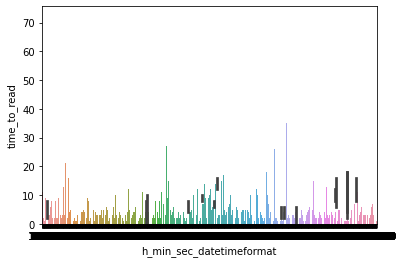

In [108]:
barplot()

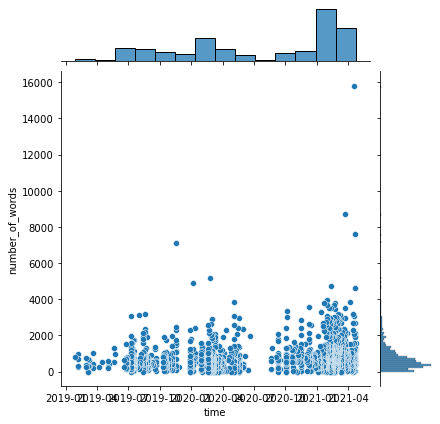

In [111]:
sns.jointplot(x = df['time'], y = df['number_of_words'], kind = 'scatter')

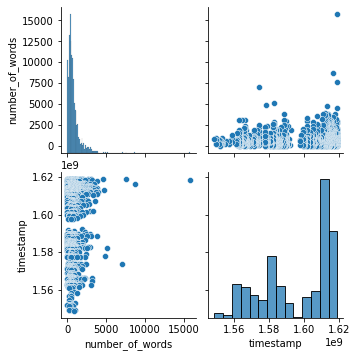

In [119]:
sns.pairplot(df)

[{'id': 153,
  'type': 'general',
  'setup': 'Want to hear a chimney joke?',
  'punchline': "Got stacks of em! First one's on the house"},
 {'id': 258,
  'type': 'general',
  'setup': 'What is the difference between ignorance and apathy?',
  'punchline': "I don't know and I don't care."},
 {'id': 246,
  'type': 'general',
  'setup': "What does a clock do when it's hungry?",
  'punchline': 'It goes back four seconds!'},
 {'id': 21,
  'type': 'general',
  'setup': 'A termite walks into a bar and says...',
  'punchline': "'Where is the bar tended?'"},
 {'id': 102,
  'type': 'general',
  'setup': 'Did you hear the one about the guy with the broken hearing aid?',
  'punchline': 'Neither did he.'},
 {'id': 239,
  'type': 'general',
  'setup': 'What do you do when you see a space man?',
  'punchline': 'Park your car, man.'},
 {'id': 356,
  'type': 'general',
  'setup': 'Why do bears have hairy coats?',
  'punchline': 'Fur protection.'},
 {'id': 348,
  'type': 'general',
  'setup': 'Why did th